In [1]:
#!pip install tensorflow-gpu

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.8.0


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## DATA PRE-PROCESSING

In [5]:
from sklearn import datasets,metrics

In [6]:
# import the dataset
cancer = datasets.load_breast_cancer()

In [7]:
print(cancer.DESCR) # to print out the description

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [8]:
# matrix of features => independent variables
x = pd.DataFrame(data=cancer.data,columns=cancer.feature_names)

In [9]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
# dependent variable
y = cancer.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [11]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [12]:
x.shape,y.shape

((569, 30), (569,))

In [16]:
# splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
x_train.shape,x_test.shape

((455, 30), (114, 30))

In [18]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [19]:
x_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [20]:
x_train.shape,x_test.shape

((455, 30), (114, 30))

In [21]:
x_train = x_train.reshape(455,30,1)
x_test = x_test.reshape(114,30,1)

In [22]:
x_train.shape,x_test.shape

((455, 30, 1), (114, 30, 1))

In [36]:
# Creating an object
model = tf.keras.models.Sequential()

In [37]:
# 1st CNN layer
model.add(tf.keras.layers.Conv1D(filters=32,kernel_size=2,activation="relu",input_shape=(30,1)))

In [38]:
# batch normalization allows each layer of the network to learn by itself a little more independent of other layers, due to batch normalization data pre-processing speeds up
model.add(tf.keras.layers.BatchNormalization())

In [39]:
# dropout layer (a regularization technique)
model.add(tf.keras.layers.Dropout(0.2))

In [40]:
# 2nd CNN layer
model.add(tf.keras.layers.Conv1D(filters=64,kernel_size=2,activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))

In [41]:
# flatten layer
model.add(tf.keras.layers.Flatten())

In [42]:
# dense layer
model.add(tf.keras.layers.Dense(units = 64, activation="relu"))
# output layer
model.add(tf.keras.layers.Dense(units = 1, activation="sigmoid"))

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 29, 32)            96        
                                                                 
 batch_normalization_4 (Batc  (None, 29, 32)           128       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 29, 32)            0         
                                                                 
 conv1d_5 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_5 (Batc  (None, 28, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 28, 64)           

In [44]:
# compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.00005)
model.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])

## TRAINING THE MODEL

In [45]:
history=model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
15/15 [==============================] - 15s 50ms/step - loss: 0.6462 - accuracy: 0.6967 - val_loss: 0.6301 - val_accuracy: 0.8596
Epoch 2/50
15/15 [==============================] - 0s 9ms/step - loss: 0.4239 - accuracy: 0.8066 - val_loss: 0.5821 - val_accuracy: 0.8947
Epoch 3/50
15/15 [==============================] - 0s 13ms/step - loss: 0.3193 - accuracy: 0.8462 - val_loss: 0.5420 - val_accuracy: 0.8509
Epoch 4/50
15/15 [==============================] - 0s 11ms/step - loss: 0.2385 - accuracy: 0.9143 - val_loss: 0.5072 - val_accuracy: 0.8596
Epoch 5/50
15/15 [==============================] - 0s 11ms/step - loss: 0.2257 - accuracy: 0.9077 - val_loss: 0.4771 - val_accuracy: 0.8333
Epoch 6/50
15/15 [==============================] - 0s 10ms/step - loss: 0.1673 - accuracy: 0.9385 - val_loss: 0.4511 - val_accuracy: 0.8158
Epoch 7/50
15/15 [==============================] - 0s 11ms/step - loss: 0.1458 - accuracy: 0.9385 - val_loss: 0.4272 - val_accuracy: 0.8158
Epoch 8/50
15

## MODEL PREDICTIONS

In [46]:
y_pred = (model.predict(x_test) > 0.5).astype("int32")

In [48]:
print(y_pred[12]),print(y_test[12])

[1]
1


(None, None)

In [49]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [50]:
# confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[43  4]
 [ 0 67]]


In [51]:
acc_cm = accuracy_score(y_test,y_pred)

In [52]:
print(acc_cm)

0.9649122807017544


## LEARNING CURVE

In [54]:
# Plotting the learning curve
def learning_curve(history,epoch):
  # training vs validation accuracy
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title("Model Accuracy")
  plt.ylabel("Accuracy")
  plt.xlabel("Epoch")
  plt.legend(['Train','val'],loc='upper left')
  plt.show()
  # training vs validation loss
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title("Model Loss")
  plt.ylabel("Loss")
  plt.xlabel("Epoch")
  plt.legend(['Train','val'],loc='upper left')
  plt.show()

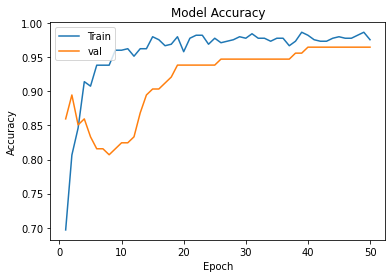

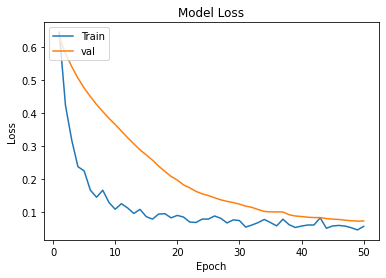

In [55]:
learning_curve(history,50)